       Reputation  GoldBadges  SilverBadges  BronzeBadges
0         1476449         881          9238          9281
1         1291690         550          4636          5484
2         1101979         375          3638          3579
3          194323         367           897          1375
4          268362         361           793          1091
...           ...         ...           ...           ...
49995        8946           5            45            64
49996        5815           5            45            63
49997       11024           5            45            63
49998        9359           5            45            63
49999        6323           5            45            63

[50000 rows x 4 columns]


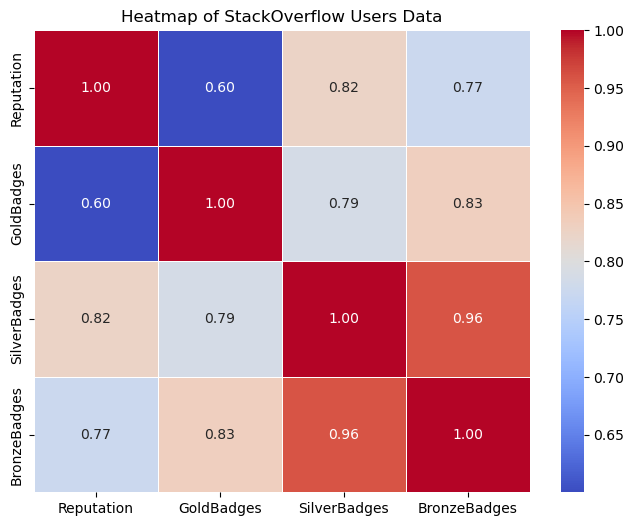

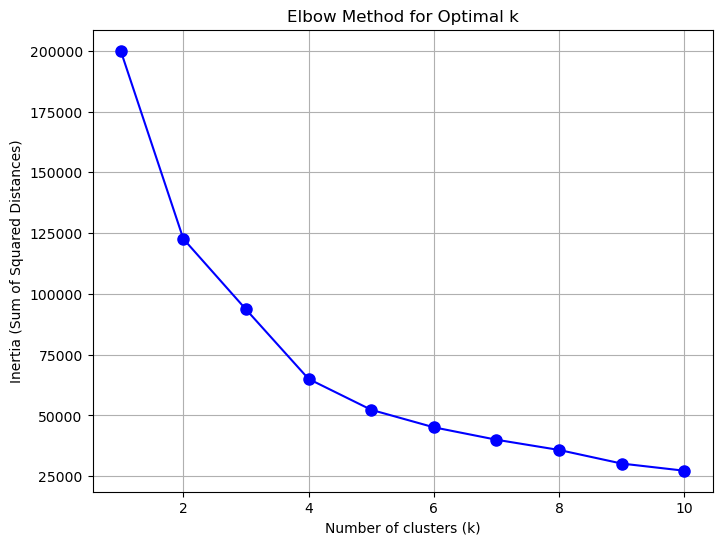

Silhouette Score: 0.874506493697758


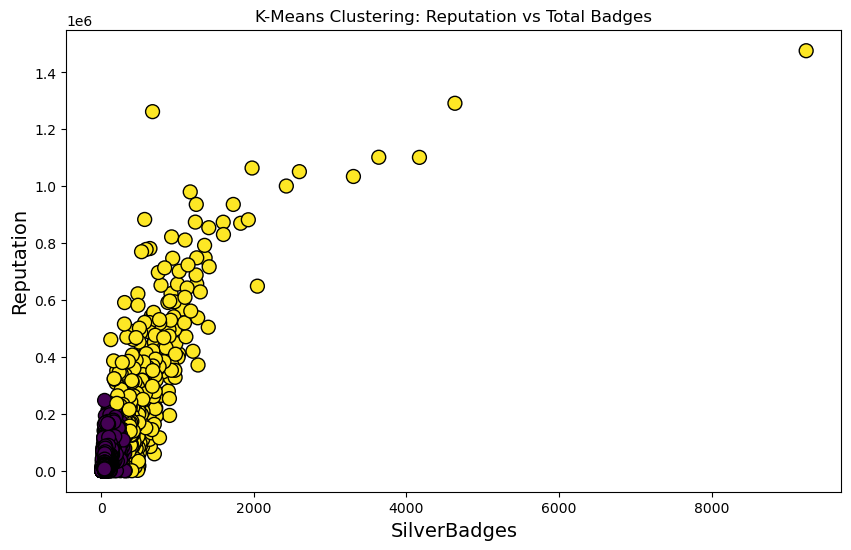

K-means output saved to kmeans_output
Accuracy: 99.99%
[[9809    1]
 [   0  190]]
Confusion Matrix:
   User ID   UserName                  Email  Reputation  GoldBadges  \
0    22656  Jon Skeet  jon skeet@outlook.com     1476449         881   
1     6309       VonC       vonc@outlook.com     1291690         550   
2   157882     BalusC    BalusC_593@live.com     1101979         375   
3     4653      leora  leora_609@hotmail.com      194323         367   
4   179736      TIMEX  TIMEX_473@outlook.com      268362         361   

   SilverBadges  BronzeBadges  Cluster  
0          9238          9281        1  
1          4636          5484        1  
2          3638          3579        1  
3           897          1375        1  
4           793          1091        1  
              precision    recall  f1-score   support

not accepted       1.00      1.00      1.00      9810
    accepted       0.99      1.00      1.00       190

    accuracy                           1.00     10000
   

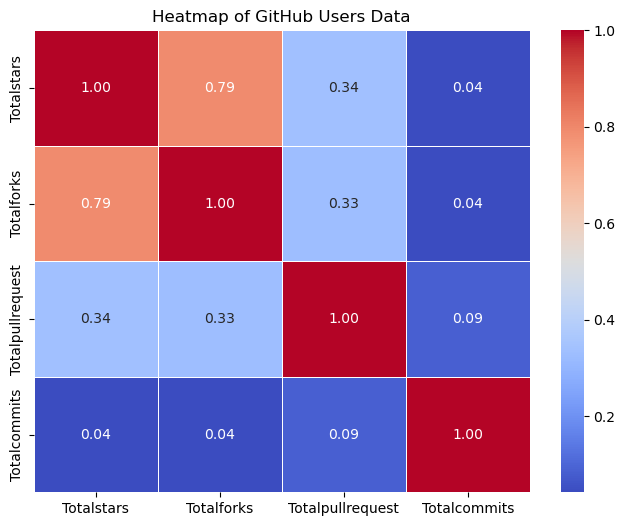

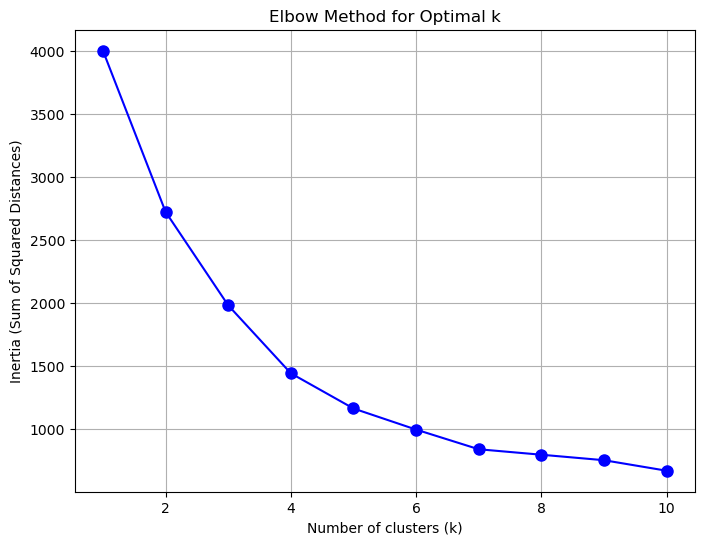

Silhouette Score: 0.8329351734415302


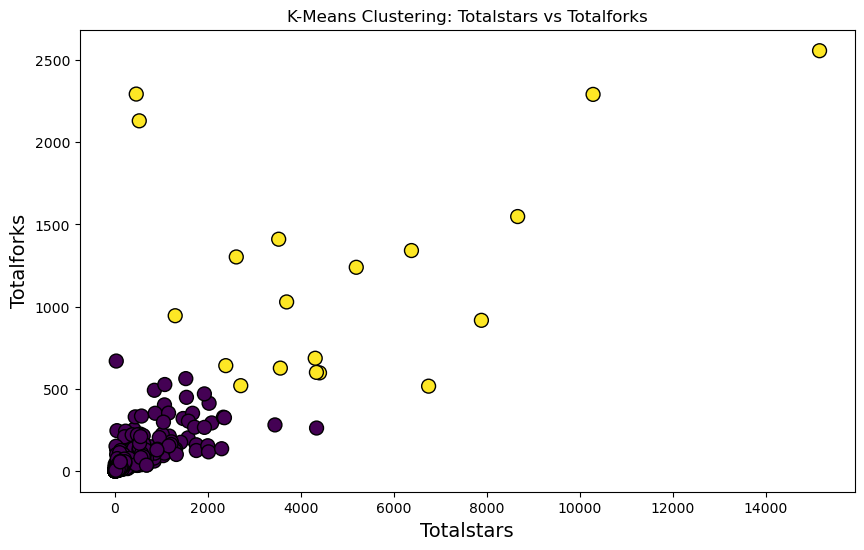

K-means output saved to kmeans_GitHub_output
Accuracy: 100.00%
[[194   0]
 [  0   6]]
Confusion Matrix:
   Username                 Email  Totalstars  Totalforks  Totalpullrequest  \
0   mojombo       tom@mojombo.com       10284        2292                71   
1   defunkt   defunkt@example.com        8662        1548                12   
2   pjhyett          pj@hyett.com         609         138                 2   
3    wycats      wycats@gmail.com         812          97                 8   
4  ezmobius  ezmobius@example.com        1571         200                 5   

   Totalcommits  Totalcontribution  Cluster  
0             0                 47        1  
1             0                  2        1  
2             0                246        0  
3             4                145        0  
4             0                168        0  
K-means output saved to GitHub_output
              precision    recall  f1-score   support

not accepted       1.00      1.00      1.00       19

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import silhouette_score

# Creating the dataframe and analysing the file content from Stack_Overflow
stackoverflow= pd.read_csv('C:/Users/Sandhya/OneDrive/Desktop/Final Raw Data/StackOverflow_users_data.csv')

# Checking the Header of Stackoverflow File
stackoverflow.head()

# Checking the Column_names of Stackoverflow File and analysing the content
stackoverflow.columns
stackoverflow.describe()

# Identifying the numeric columns
selected_columns = stackoverflow[['Reputation', 'GoldBadges', 'SilverBadges', 'BronzeBadges']]
print(selected_columns)

# Correlation Matrix and Heatmap for Stackoverflow
corr_matrix = selected_columns.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Heatmap of StackOverflow Users Data')
plt.show()


# Standardize the features for Stackoverflow
X = selected_columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply the Elbow method for Stackoverflow
k_range = range(1, 11)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
# Plot the Elbow curve for Stackoverflow
plt.figure(figsize=(8,6))
plt.plot(k_range, inertia,'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Optimal KMeans Algorithm for Stackoverflow
optimal_k = 2 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
stackoverflow['Cluster'] = kmeans.fit_predict(X_scaled)
sil_score = silhouette_score(X_scaled, stackoverflow['Cluster'])
print(f'Silhouette Score: {sil_score}')

# Ploting of K-Means Algorithm for Stackoverflow
plt.figure(figsize=(10, 6))
plt.scatter( stackoverflow['SilverBadges'],stackoverflow['Reputation'], c=stackoverflow['Cluster'],cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title('K-Means Clustering: Reputation vs Total Badges')
plt.xlabel('SilverBadges',fontsize=14)
plt.ylabel('Reputation', fontsize=14)
plt.show()

# Save the DataFrame with the cluster labels to a CSV file
kmeans_output= 'C:/Users/Sandhya/Downloads/kmeans_output.csv'
stackoverflow.to_csv(kmeans_output, index=False)
print(f"K-means output saved to {'kmeans_output'}")

# Logistic Regression Algorithm for Stackoverflow
kmeans_output= pd.read_csv('C:/Users/Sandhya/Downloads/kmeans_output.csv')
selected_features=kmeans_output[['Reputation', 'GoldBadges', 'SilverBadges', 'BronzeBadges']]
X = selected_features
y= kmeans_output.Cluster
scaler = StandardScaler()
X1 = scaler.fit_transform(X)
X1_train,X1_test, y_train,y_test= train_test_split(X1,y,test_size = 0.20,random_state=42) # (Split/ Train/Test)
logreg=LogisticRegression(solver='lbfgs',max_iter= 50000)
logreg.fit(X1_train,y_train)
y_pred=logreg.predict(X1_test)# prediction

# Checking Accuracy  and Confusion Matrix for Stackoverflow
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print("Confusion Matrix:")

# Add the predictions to the original dataframe based on test set indices
test_indices = y_test.index  # Get the indices of the test set from y_test
print(kmeans_output.head())  # Adjust this to see more rows if needed

# Insert the predictions into the DataFrame
kmeans_output.loc[test_indices, 'Logistic_Regression_Predictions'] = y_pred

# Claasification Matrix_Stackoverflow
target_names =['not accepted','accepted']
print (classification_report(y_test,y_pred,target_names=target_names))


# Printing the Output for Stackoverflow
kmeans_output.to_csv('C:/Users/Sandhya/Downloads/logistic_regression_results.csv', index=False)
print(f"logistic regression output saved to {'logistic_regression_result'}")

######GitHub####

# Creating the dataframe and analysing the file content from GitHub
Git_Hub= pd.read_csv('C:/Users/Sandhya/OneDrive/Desktop/Final Raw Data/github_users_data.csv')

# Checking the Header of GitHub file
Git_Hub.head()

# Checking the Column_names of GitHub File and analysing the content
Git_Hub.columns
Git_Hub.describe()

# Identifying the numeric columns
selected_features_Git = Git_Hub[['Totalstars', 'Totalforks', 'Totalpullrequest', 'Totalcommits']]
print(selected_features_Git)

# Correlation Matrix and Heatmap for GitHub
corr_matrix = selected_features_Git.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Heatmap of GitHub Users Data')
plt.show()


# Standardize the features for GitHub
G = selected_features_Git
scaler = StandardScaler()
G_scaled = scaler.fit_transform(G)

# Apply the Elbow method for GitHub
k_range = range(1, 11)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(G_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve for GitHub
plt.figure(figsize=(8,6))
plt.plot(k_range, inertia,'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


# Optimal KMeans Algorithm for GitHub
optimal_k = 2  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
Git_Hub['Cluster'] = kmeans.fit_predict(G_scaled)
sil_score = silhouette_score(G_scaled, Git_Hub['Cluster'])
print(f'Silhouette Score: {sil_score}')

# Ploting of K-Means Algorithm for GitHub
plt.figure(figsize=(10, 6))
plt.scatter(Git_Hub['Totalstars'],Git_Hub['Totalforks'],c=Git_Hub['Cluster'],cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title('K-Means Clustering: Totalstars vs Totalforks')
plt.xlabel('Totalstars',fontsize=14)
plt.ylabel('Totalforks', fontsize=14)
plt.show()

# Save the DataFrame with the cluster labels to a CSV file
kmeans_GitHub_output= 'C:/Users/Sandhya/Downloads/kmeans_GitHub_output.csv'
Git_Hub.to_csv(kmeans_GitHub_output, index=False)
print(f"K-means output saved to {'kmeans_GitHub_output'}")

#Logistic Algorithm for GitHub

kmeans_GitHub_output= pd.read_csv('C:/Users/Sandhya/Downloads/kmeans_GitHub_output.csv')
features_GitHub=kmeans_GitHub_output[['Totalstars', 'Totalforks', 'Totalpullrequest', 'Totalcommits']]
A = features_GitHub
b= kmeans_GitHub_output.Cluster
scaler = StandardScaler()
A1 = scaler.fit_transform(A)
A1_train,A1_test, b_train,b_test= train_test_split(A1,b,test_size = 0.20,random_state=42)#Split/Train/Test
logreg=LogisticRegression(solver='lbfgs',max_iter= 2000)
logreg.fit(A1_train,b_train)
b_pred=logreg.predict(A1_test)#predictions

# Checking Accuracy  and Confusion Matrix for GitHub
accuracy = accuracy_score(b_test, b_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
conf_matrix = confusion_matrix(b_test, b_pred)
print(conf_matrix)
print("Confusion Matrix:")


# Add the predictions to the original dataframe based on test set indices
test_indices = b_test.index  # Get the indices of the test set from y_test
print(kmeans_GitHub_output.head()) 

# Insert the predictions into the DataFrame
kmeans_GitHub_output.loc[test_indices, 'Logistic_Regression_Predictions_GitHub'] = b_pred
#kmeans_GitHub_output = C:/Users/Sandhya/Downloads/GitHub_output.csv
kmeans_GitHub_output.to_csv('C:/Users/Sandhya/Downloads/GitHub_output.csv', index=False)
print(f"K-means output saved to {'GitHub_output'}")

#Classification Matrix for GitHub
target_names=['not accepted','accepted']
print (classification_report(b_test,b_pred,target_names =target_names))
